# Canny Edge Detector

Having seen how the Canny filter works in the 1-D case in the theoretical exercise, we now move onto the 2-D case. In 2-D, the gradient magnitude is a measure for the strength of an edge, while direction of the gradient vector gives edge orientation. Edge detection can be done by thresholding the gradient magnitude, though this generally results in thick contours which are poorly localized. To thin the contours into single-pixel-wide lines, one should use non-maximum suppression. Pixels in the contour are kept as edge pixels only if its gradient magnitude is greater than that of its two neighboring pixels in the direction orthogonal to the edge, i.e. where the gradient is a maximum.

In [1]:
import numpy as np
from scipy.ndimage.filters import gaussian_filter,convolve
import matplotlib.pyplot as plt
from scipy import where
import cv2
%matplotlib inline

In [2]:
### Read Image ###
im=cv2.imread('./zurlim.png', 0).astype('float')

(512, 512)


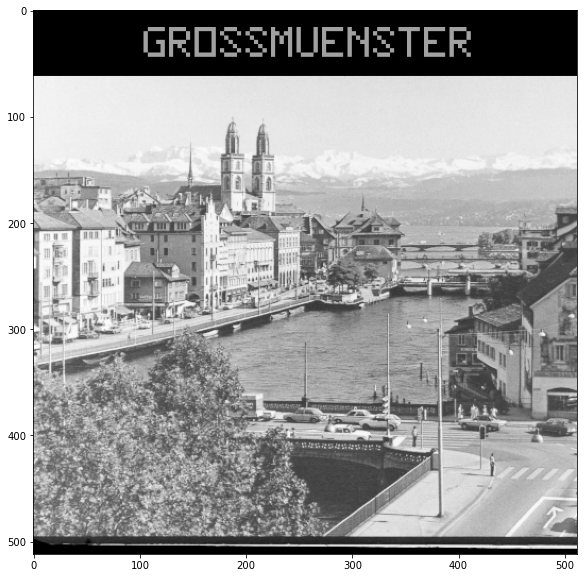

In [3]:
print(im.shape)
plt.figure(figsize=(10,10))
plt.imshow(im,cmap='gray')
plt.show()

## Gaussian Smooth Image

(512, 512)


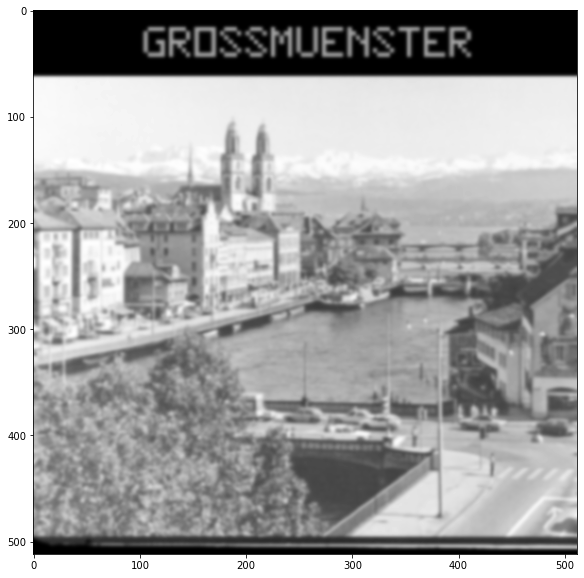

In [4]:
####### Gaussian Smooth Image #######
# TODO: Implement Gaussian Smoothing
# Useful functions: gaussian_filter

blurred_im = gaussian_filter(im,1.5)
print(blurred_im.shape)
plt.figure(figsize=(10,10))
plt.imshow(blurred_im,cmap='gray')
plt.show()

## Gradient Image: 

In [5]:
###### Gradients x and y (Sobel filters) ######
# TODO: Implement Gradient along x and y
# Useful functions: convolve

x_sobel = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
y_sobel = [[-1, -2, -1], [0, 0, 0], [1, 2, 1]]

im_x = convolve(im, x_sobel)
im_y = convolve(im, y_sobel)

## Orientation Map
At each pixel, the orientation of an edge can be obtained from the direction of the gradient.
Note that edge directions α and α + π are equivalent. The resulting directions can be coded as
grey values.

In [6]:
###### gradient and direction ########
# TODO: Implement Gradient Magnitude and Direction

# Define 2D Array for the Gradient
gradient = np.ndarray(shape = (im.shape[0],im.shape[1]), dtype = float)
theta = np.ndarray(shape = (im.shape[0],im.shape[1]), dtype = float)

for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        gradient[i][j] = np.sqrt(((im_x[i][j])**2) + ((im_y[i][j])**2))
        theta[i][j] = (np.arctan2(im_y[i][j],im_x[i][j]))


## Edge image according to the threshold criteria
Each pixel at which the gradient magnitude exceeds a given threshold is displayed.

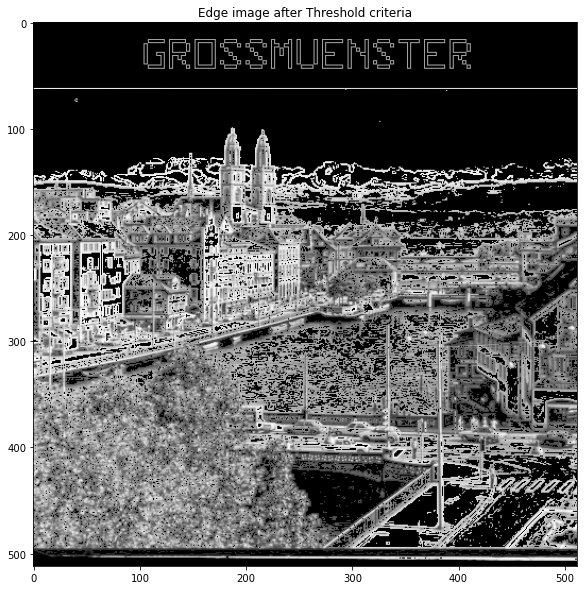

In [7]:
thresh=30;
# TODO: Implement Thresholding

thresholdEdges = np.zeros(shape = (im.shape[0],im.shape[1]), dtype = float)

for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        if (gradient[i][j] >= thresh):
            thresholdEdges[i][j] = im[i][j]

plt.figure(figsize=(10,10))
plt.title('Edge image after Threshold criteria')
plt.imshow(thresholdEdges,cmap='gray')
plt.show()

## Non-Maximum-Suppression
Each pixel which fulfills the threshold criterion and has a larger gradient magnitude than its adjacent pixels in the direction orthogonal to the edge is displayed.

In [8]:
# TODO: Implement Non-Maximum Suppression

###### Convert to degree ######
theta_deg = np.ndarray(shape = (im.shape[0],im.shape[1]), dtype = float)

for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        theta_deg[i][j] = theta[i][j]*(180. / np.pi)
        if (theta_deg[i][j]<(0)):
            theta_deg[i][j] += 180
            
###### Quantize angles ######
for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        # Angle 0
        if ((157.5 <= theta_deg[i][j] <= 180) or (0 <= theta_deg[i][j] < 22.5)):
            theta_deg[i][j] = 0
        
        # Angle 45
        elif (22.5 <= theta_deg[i][j] < 67.5):
            theta_deg[i][j] = 45
            
        # Angle 90
        elif (67.5 <= theta_deg[i][j] < 112.5):
            theta_deg[i][j] = 90
            
        # Angle 135
        elif (112.5 <= theta_deg[i][j] < 157.5):
            theta_deg[i][j] = 135



In [9]:
###### Non-maximum suppression ########

edges = np.zeros(shape = (im.shape[0],im.shape[1]), dtype = float)

# Compare with adjacent pixels in the direction orthogonal to the edge
for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        
        try:
            # Angle 0
            if (theta_deg[i][j] == 0):

                # Compare with pixels [i,j+1] and [i,j-1]
                if ((gradient[i][j] > gradient[i][j+1]) and (gradient[i][j] > gradient[i][j-1]) and gradient[i][j] >= thresh):
                    edges[i][j] = im[i][j]

            # Angle 45
            elif (theta_deg[i][j] == 45):

                # Compare with pixels [i+1,j+1] and [i-1,j-1]
                if ((gradient[i][j] > gradient[i+1][j+1]) and (gradient[i][j] > gradient[i-1][j-1]) and gradient[i][j] >= thresh):
                    edges[i][j] = im[i][j]

            # Angle 90
            elif (theta_deg[i][j] == 90):

                # Compare with pixels [i-1,j] and [i+1,j]
                if ((gradient[i][j] > gradient[i-1][j]) and (gradient[i][j] > gradient[i+1][j]) and gradient[i][j] >= thresh):
                    edges[i][j] = im[i][j]

            # Angle 135
            elif (theta_deg[i][j] == 135):

                # Compare with pixels [i-1,j+1] and [i+1,j-1]
                if ((gradient[i][j] > gradient[i-1][j+1]) and (gradient[i][j] > gradient[i+1][j-1]) and gradient[i][j] >= thresh):
                    edges[i][j] = im[i][j]

        except IndexError as e:
             pass


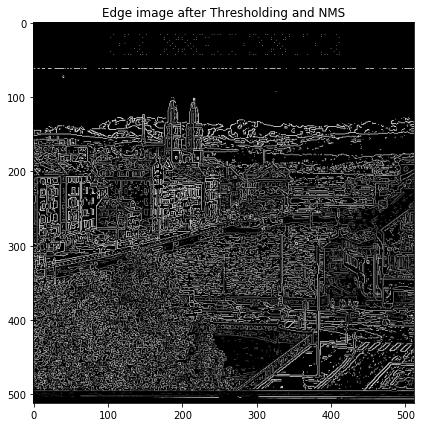

In [10]:
plt.figure(figsize=(7,7))
plt.title('Edge image after Thresholding and NMS')
plt.imshow(edges,cmap='gray')
plt.show()

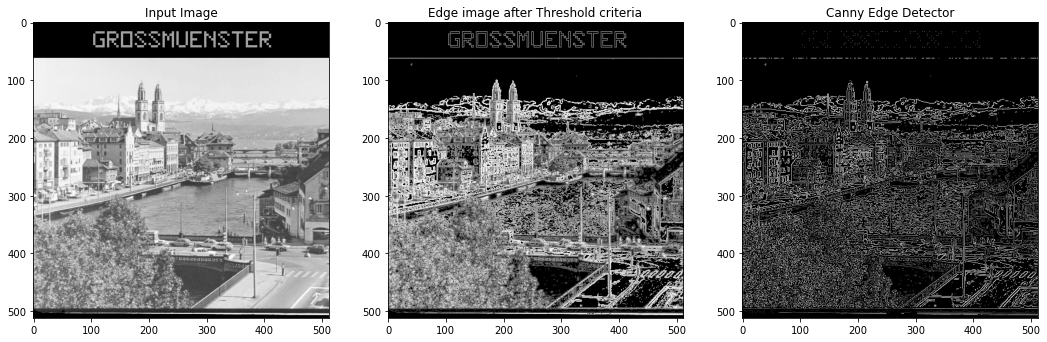

In [11]:
# Plotting of results
# No need to change it
f, ax_arr = plt.subplots(1, 3, figsize=(18, 16))
ax_arr[0].set_title("Input Image")
ax_arr[1].set_title("Edge image after Threshold criteria")
ax_arr[2].set_title("Canny Edge Detector")
ax_arr[0].imshow(im, cmap='gray')
ax_arr[1].imshow(thresholdEdges, cmap='gray')
ax_arr[2].imshow(edges, cmap='gray')

In [12]:
### Read Image ###
im=cv2.imread('./cube_left.pgm', 0).astype('float')

(240, 320)


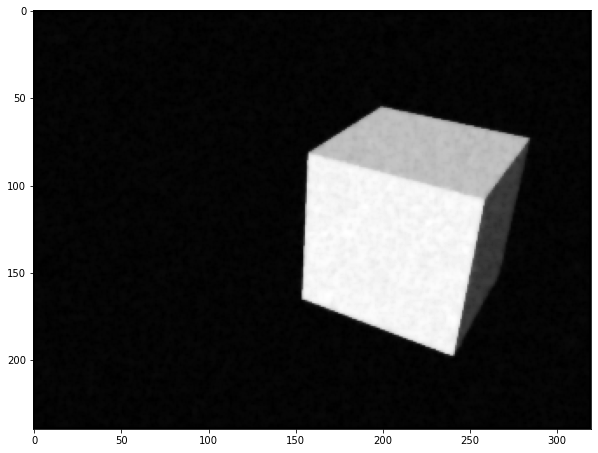

In [13]:
print(im.shape)
plt.figure(figsize=(10,10))
plt.imshow(im,cmap='gray')
plt.show()

(240, 320)


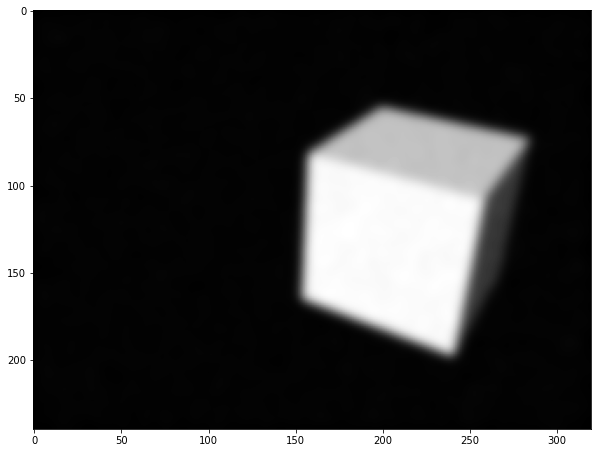

In [14]:
####### Gaussian Smooth Image #######
# TODO: Implement Gaussian Smoothing
# Useful functions: gaussian_filter

#blurred_im = ...
#print(blurred_im.shape)
blurred_im = gaussian_filter(im,3)
print(blurred_im.shape)
plt.figure(figsize=(10,10))
plt.imshow(blurred_im,cmap='gray')
plt.show()

In [15]:
###### Gradients x and y (Sobel filters) ######
# TODO: Implement Gradient along x and y
# Useful functions: convolve

x_sobel = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
y_sobel = [[-1, -2, -1], [0, 0, 0], [1, 2, 1]]

im_x = convolve(im, x_sobel)
im_y = convolve(im, y_sobel)

In [16]:
###### gradient and direction ########
# TODO: Implement Gradient Magnitude and Direction

# Define 2D Array for the Gradient
gradient = np.ndarray(shape = (im.shape[0],im.shape[1]), dtype = float)
theta = np.ndarray(shape = (im.shape[0],im.shape[1]), dtype = float)

for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        gradient[i][j] = np.sqrt(((im_x[i][j])**2) + ((im_y[i][j])**2))
        theta[i][j] = (np.arctan2(im_y[i][j],im_x[i][j]))


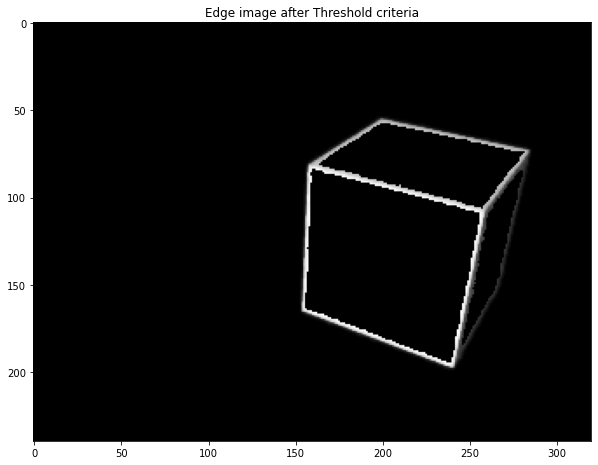

In [17]:
thresh=52;
# TODO: Implement Thresholding

thresholdEdges = np.zeros(shape = (im.shape[0],im.shape[1]), dtype = float)

for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        if (gradient[i][j] >= thresh):
            thresholdEdges[i][j] = im[i][j]

plt.figure(figsize=(10,10))
plt.title('Edge image after Threshold criteria')
plt.imshow(thresholdEdges,cmap='gray')
plt.show()

In [18]:
# TODO: Implement Non-Maximum Suppression

###### Convert to degree ######
theta_deg = np.ndarray(shape = (im.shape[0],im.shape[1]), dtype = float)

for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        theta_deg[i][j] = theta[i][j]*(180. / np.pi)
        if (theta_deg[i][j]<(0)):
            theta_deg[i][j] += 180
            
###### Quantize angles ######
for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        # Angle 0
        if ((157.5 <= theta_deg[i][j] <= 180) or (0 <= theta_deg[i][j] < 22.5)):
            theta_deg[i][j] = 0
        
        # Angle 45
        elif (22.5 <= theta_deg[i][j] < 67.5):
            theta_deg[i][j] = 45
            
        # Angle 90
        elif (67.5 <= theta_deg[i][j] < 112.5):
            theta_deg[i][j] = 90
            
        # Angle 135
        elif (112.5 <= theta_deg[i][j] < 157.5):
            theta_deg[i][j] = 135



In [19]:
###### Non-maximum suppression ########

edges = np.zeros(shape = (im.shape[0],im.shape[1]), dtype = float)

# Compare with adjacent pixels in the direction orthogonal to the edge
for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        
        try:
            # Angle 0
            if (theta_deg[i][j] == 0):

                # Compare with pixels [i,j+1] and [i,j-1]
                if ((gradient[i][j] > gradient[i][j+1]) and (gradient[i][j] > gradient[i][j-1]) and gradient[i][j] >= thresh):
                    edges[i][j] = im[i][j]

            # Angle 45
            elif (theta_deg[i][j] == 45):

                # Compare with pixels [i+1,j+1] and [i-1,j-1]
                if ((gradient[i][j] > gradient[i+1][j+1]) and (gradient[i][j] > gradient[i-1][j-1]) and gradient[i][j] >= thresh):
                    edges[i][j] = im[i][j]

            # Angle 90
            elif (theta_deg[i][j] == 90):

                # Compare with pixels [i-1,j] and [i+1,j]
                if ((gradient[i][j] > gradient[i-1][j]) and (gradient[i][j] > gradient[i+1][j]) and gradient[i][j] >= thresh):
                    edges[i][j] = im[i][j]

            # Angle 135
            elif (theta_deg[i][j] == 135):

                # Compare with pixels [i-1,j+1] and [i+1,j-1]
                if ((gradient[i][j] > gradient[i-1][j+1]) and (gradient[i][j] > gradient[i+1][j-1]) and gradient[i][j] >= thresh):
                    edges[i][j] = im[i][j]

        except IndexError as e:
             pass


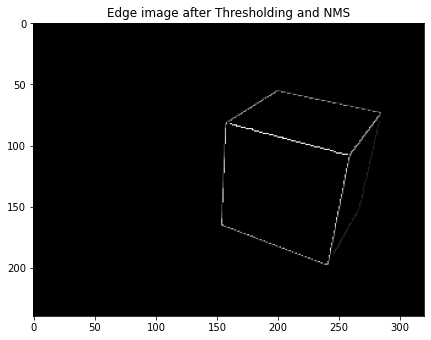

In [20]:
plt.figure(figsize=(7,7))
plt.title('Edge image after Thresholding and NMS')
plt.imshow(edges,cmap='gray')
plt.show()

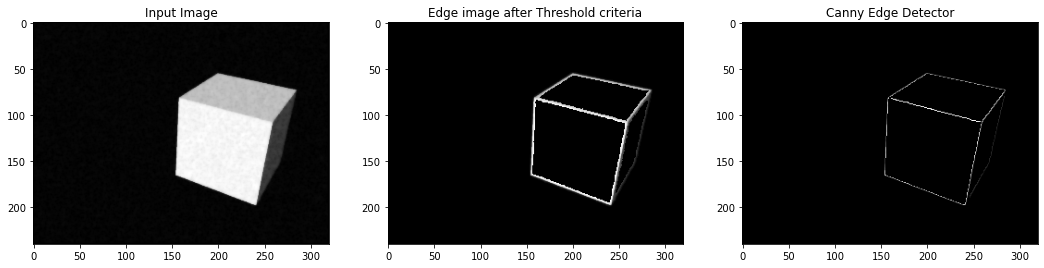

In [21]:
# Plotting of results
# No need to change it
f, ax_arr = plt.subplots(1, 3, figsize=(18, 16))
ax_arr[0].set_title("Input Image")
ax_arr[1].set_title("Edge image after Threshold criteria")
ax_arr[2].set_title("Canny Edge Detector")
ax_arr[0].imshow(im, cmap='gray')
ax_arr[1].imshow(thresholdEdges, cmap='gray')
ax_arr[2].imshow(edges, cmap='gray')

In [22]:
### Read Image ###
im=cv2.imread('./cube_right.pgm', 0).astype('float')

(240, 320)


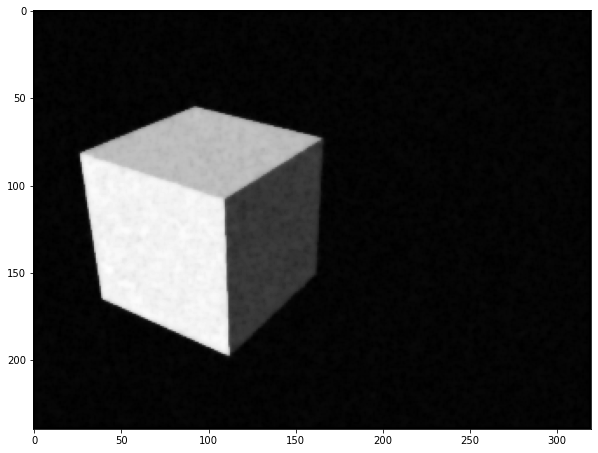

In [23]:
print(im.shape)
plt.figure(figsize=(10,10))
plt.imshow(im,cmap='gray')
plt.show()

(240, 320)


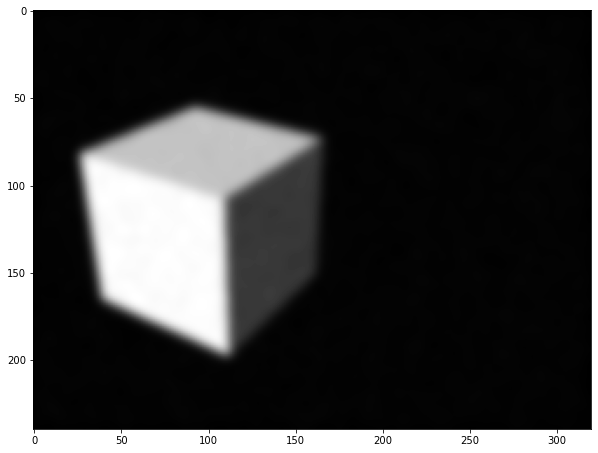

In [24]:
####### Gaussian Smooth Image #######
# TODO: Implement Gaussian Smoothing
# Useful functions: gaussian_filter

#blurred_im = ...
#print(blurred_im.shape)
blurred_im = gaussian_filter(im,3)
print(blurred_im.shape)
plt.figure(figsize=(10,10))
plt.imshow(blurred_im,cmap='gray')
plt.show()

In [25]:
###### Gradients x and y (Sobel filters) ######
# TODO: Implement Gradient along x and y
# Useful functions: convolve

x_sobel = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
y_sobel = [[-1, -2, -1], [0, 0, 0], [1, 2, 1]]

im_x = convolve(im, x_sobel)
im_y = convolve(im, y_sobel)

In [26]:
###### gradient and direction ########
# TODO: Implement Gradient Magnitude and Direction

# Define 2D Array for the Gradient
gradient = np.ndarray(shape = (im.shape[0],im.shape[1]), dtype = float)
theta = np.ndarray(shape = (im.shape[0],im.shape[1]), dtype = float)

for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        gradient[i][j] = np.sqrt(((im_x[i][j])**2) + ((im_y[i][j])**2))
        theta[i][j] = (np.arctan2(im_y[i][j],im_x[i][j]))


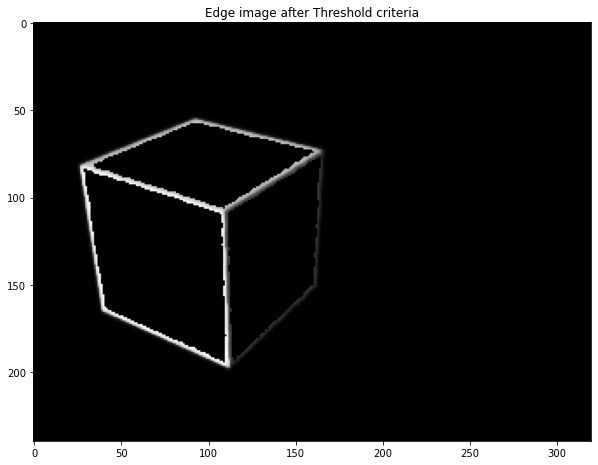

In [27]:
thresh=54;
# TODO: Implement Thresholding

thresholdEdges = np.zeros(shape = (im.shape[0],im.shape[1]), dtype = float)

for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        if (gradient[i][j] >= thresh):
            thresholdEdges[i][j] = im[i][j]

plt.figure(figsize=(10,10))
plt.title('Edge image after Threshold criteria')
plt.imshow(thresholdEdges,cmap='gray')
plt.show()

In [28]:
# TODO: Implement Non-Maximum Suppression

###### Convert to degree ######
theta_deg = np.ndarray(shape = (im.shape[0],im.shape[1]), dtype = float)

for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        theta_deg[i][j] = theta[i][j]*(180. / np.pi)
        if (theta_deg[i][j]<(0)):
            theta_deg[i][j] += 180
            
###### Quantize angles ######
for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        # Angle 0
        if ((157.5 <= theta_deg[i][j] <= 180) or (0 <= theta_deg[i][j] < 22.5)):
            theta_deg[i][j] = 0
        
        # Angle 45
        elif (22.5 <= theta_deg[i][j] < 67.5):
            theta_deg[i][j] = 45
            
        # Angle 90
        elif (67.5 <= theta_deg[i][j] < 112.5):
            theta_deg[i][j] = 90
            
        # Angle 135
        elif (112.5 <= theta_deg[i][j] < 157.5):
            theta_deg[i][j] = 135



In [29]:
###### Non-maximum suppression ########

edges = np.zeros(shape = (im.shape[0],im.shape[1]), dtype = float)

# Compare with adjacent pixels in the direction orthogonal to the edge
for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        
        try:
            # Angle 0
            if (theta_deg[i][j] == 0):

                # Compare with pixels [i,j+1] and [i,j-1]
                if ((gradient[i][j] > gradient[i][j+1]) and (gradient[i][j] > gradient[i][j-1]) and gradient[i][j] >= thresh):
                    edges[i][j] = im[i][j]

            # Angle 45
            elif (theta_deg[i][j] == 45):

                # Compare with pixels [i+1,j+1] and [i-1,j-1]
                if ((gradient[i][j] > gradient[i+1][j+1]) and (gradient[i][j] > gradient[i-1][j-1]) and gradient[i][j] >= thresh):
                    edges[i][j] = im[i][j]

            # Angle 90
            elif (theta_deg[i][j] == 90):

                # Compare with pixels [i-1,j] and [i+1,j]
                if ((gradient[i][j] > gradient[i-1][j]) and (gradient[i][j] > gradient[i+1][j]) and gradient[i][j] >= thresh):
                    edges[i][j] = im[i][j]

            # Angle 135
            elif (theta_deg[i][j] == 135):

                # Compare with pixels [i-1,j+1] and [i+1,j-1]
                if ((gradient[i][j] > gradient[i-1][j+1]) and (gradient[i][j] > gradient[i+1][j-1]) and gradient[i][j] >= thresh):
                    edges[i][j] = im[i][j]

        except IndexError as e:
             pass


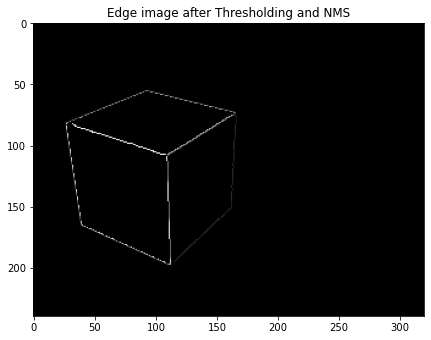

In [30]:
plt.figure(figsize=(7,7))
plt.title('Edge image after Thresholding and NMS')
plt.imshow(edges,cmap='gray')
plt.show()

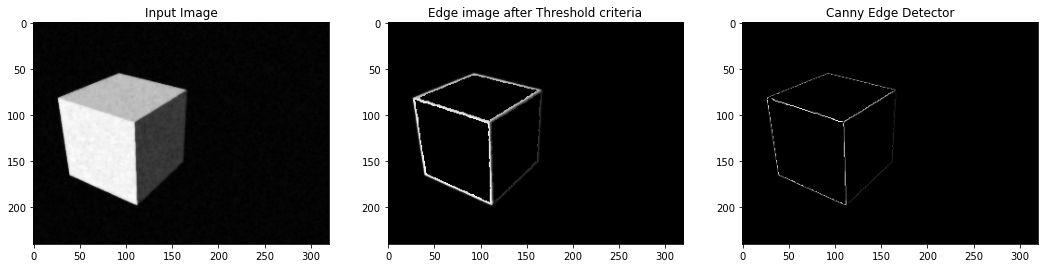

In [31]:
# Plotting of results
# No need to change it
f, ax_arr = plt.subplots(1, 3, figsize=(18, 16))
ax_arr[0].set_title("Input Image")
ax_arr[1].set_title("Edge image after Threshold criteria")
ax_arr[2].set_title("Canny Edge Detector")
ax_arr[0].imshow(im, cmap='gray')
ax_arr[1].imshow(thresholdEdges, cmap='gray')
ax_arr[2].imshow(edges, cmap='gray')